<a href="https://colab.research.google.com/github/joezerr/Project/blob/main/KMEANS_UAS_Machine_Learning_No_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

**Import K-means dataset**

In [ ]:
url = ("https://raw.githubusercontent.com/joezerr/UASMachineLearning/main/DNA.csv")

**Getting to know the datasets (Data exploration)**

In [ ]:
no2 = pd.read_csv(url, sep=";", header=None)
no2.head()

,0,1
0,14,6
1,11,5
2,15,6
3,21,7
4,20,7


In [ ]:
no2.columns = ["num_of_atoms","num_of_heavy_atoms"]
no2.head()

,num_of_atoms,num_of_heavy_atoms
0,14,6
1,11,5
2,15,6
3,21,7
4,20,7


In [ ]:
no2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14610 entries, 0 to 14609
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   num_of_atoms        14610 non-null  int64
 1   num_of_heavy_atoms  14610 non-null  int64
dtypes: int64(2)
memory usage: 228.4 KB


In [ ]:
no2.describe()

,num_of_atoms,num_of_heavy_atoms
count,14610.000000,14610.000000
mean,14.412594,5.903285
std,4.693705,1.113774
min,2.000000,2.000000
25%,11.000000,5.000000
50%,15.000000,6.000000
75%,18.000000,7.000000
max,33.000000,11.000000


In [ ]:
no2.isnull().sum()

num_of_atoms          0
num_of_heavy_atoms    0
dtype: int64

**DATA PREPROCESSING**

the process that i will be using to process the data is outlier removal

*OUTLIER REMOVAL*

the method that will be used is Z score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


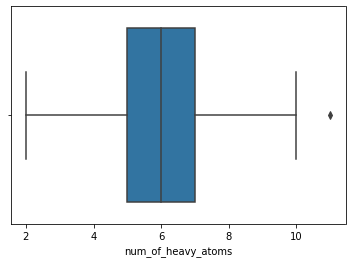

In [ ]:
#check for any outilier in column num_of_havy_atoms
sns.boxplot(no2['num_of_heavy_atoms'])

As seen above, it turns out that num_of_heavy_atoms has outliers

In [ ]:
#check shape pre outlier
no2

,num_of_atoms,num_of_heavy_atoms
0,14,6
1,11,5
2,15,6
3,21,7
4,20,7
...,...,...
14605,15,6
14606,14,6
14607,18,6
14608,17,6


In [ ]:
#finding the outlier boundary
print("Highest allowed",no2['num_of_heavy_atoms'].mean() + 3*no2['num_of_heavy_atoms'].std())
print("Lowest allowed",no2['num_of_heavy_atoms'].mean() - 3*no2['num_of_heavy_atoms'].std())

Highest allowed 9.24460622528426
Lowest allowed 2.5619646166048575


In [ ]:
#list the outlier
no2[(no2['num_of_heavy_atoms'] > 9.24) | (no2['num_of_heavy_atoms'] < 2.56)]

,num_of_atoms,num_of_heavy_atoms
162,5,2
213,32,10
529,30,10
1095,32,10
1615,5,2
1908,5,2
1963,3,2
2045,30,10
2330,4,2
3055,5,2


In [ ]:
#trim the outlier
no2_new = no2[(no2['num_of_heavy_atoms'] < 9.24) & (no2['num_of_heavy_atoms'] > 2.56)]
no2_new

,num_of_atoms,num_of_heavy_atoms
0,14,6
1,11,5
2,15,6
3,21,7
4,20,7
...,...,...
14605,15,6
14606,14,6
14607,18,6
14608,17,6


In [ ]:
#capping the outlier
upper_limit = no2['num_of_heavy_atoms'].mean() + 3*no2['num_of_heavy_atoms'].std()
lower_limit = no2['num_of_heavy_atoms'].mean() - 3*no2['num_of_heavy_atoms'].std()

In [ ]:
#apply capping
no2['num_of_heavy_atoms'] = np.where(
    no2['num_of_heavy_atoms']>upper_limit,
    upper_limit,
    np.where(
        no2['num_of_heavy_atoms']<lower_limit,
        lower_limit,
        no2['num_of_heavy_atoms']
    )
)

In [ ]:
no2['num_of_heavy_atoms'].describe()

count    14610.000000
mean         5.904095
std          1.105491
min          2.561965
25%          5.000000
50%          6.000000
75%          7.000000
max          9.244606
Name: num_of_heavy_atoms, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


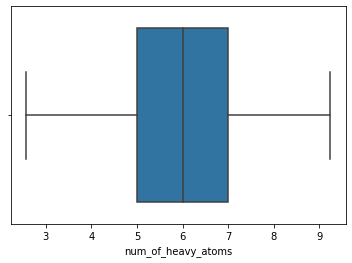

In [ ]:
#check again wheter the outlier is remover or no 
sns.boxplot(no2['num_of_heavy_atoms'])

outlier successfully removed

In [ ]:
no2_new

,num_of_atoms,num_of_heavy_atoms
0,14,6
1,11,5
2,15,6
3,21,7
4,20,7
...,...,...
14605,15,6
14606,14,6
14607,18,6
14608,17,6


In [ ]:
X = no2_new[["num_of_atoms","num_of_heavy_atoms"]]

**Visualize the data points**

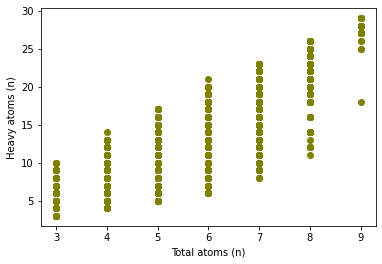

In [ ]:
plt.scatter(X["num_of_heavy_atoms"],X["num_of_atoms"],c='olive')
plt.xlabel('Total atoms (n)')
plt.ylabel('Heavy atoms (n)')
plt.show()

**KMEANS**

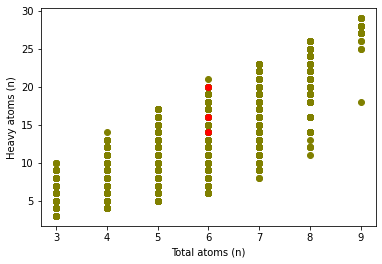

In [ ]:
#set k value
K = 3

#select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["num_of_heavy_atoms"],X["num_of_atoms"],c='olive')
plt.scatter(Centroids["num_of_heavy_atoms"],Centroids["num_of_atoms"],c='red')
plt.xlabel('Total atoms (n)')
plt.ylabel('Heavy atoms (n)')
plt.show()

In [ ]:
difference = 1
j=0

while(difference!=0):
    XD=X

    #create original dataframe copy
    i=1
    
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            dist1=(row_c["num_of_heavy_atoms"]-row_d["num_of_heavy_atoms"])**2
            dist2=(row_c["num_of_atoms"]-row_d["num_of_atoms"])**2
            total_dist=np.sqrt(dist1+dist2)
            ED.append(total_dist)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    #assign closest cluster to every data point
    X["Cluster"]=C
    #group each cluster according to respecetives mean value ro create new centroids
    Centroids_new = X.groupby(["Cluster"]).mean()[["num_of_atoms","num_of_heavy_atoms"]]
    if j == 0:
        difference=1
        j=j+1
    else:
      #check any differences (old and new centroids)
        difference = (Centroids_new['num_of_atoms'] - Centroids['num_of_atoms']).sum() + (Centroids_new['num_of_heavy_atoms'] - Centroids['num_of_heavy_atoms']).sum()
        print(difference.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["num_of_atoms","num_of_heavy_atoms"]]

-2.514697357447555
-2.391997813115017
-2.6472417867349893
-0.5412601179942209
-1.6236881608722618
-0.7397179983262232
-0.06712689717685993
0.0


**Plot the result**

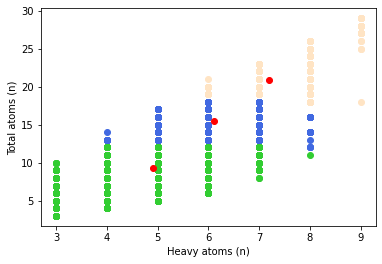

In [ ]:
color=['royalblue','limegreen','bisque']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["num_of_heavy_atoms"],data["num_of_atoms"],c=color[k])
plt.scatter(Centroids["num_of_heavy_atoms"],Centroids["num_of_atoms"],c='red')
plt.xlabel('Heavy atoms (n)')
plt.ylabel('Total atoms (n)')
plt.show()